<a href="https://colab.research.google.com/github/anissval/colabs-data-analytics-/blob/main/modulo9/Trabajo_Final_M%C3%B3dulo9_Valdiviezo_Anahi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

# **Trabajo Final - Módulo 9 - Aprendizaje Automático - Machine Learning - Clasificación**

![logo](https://www.python.org/static/community_logos/python-powered-w-100x40.png)

~~~
Anahi Valdiviezo
~~~

**En virtud del DataFrame propuesto, generar modelos de clasificación para predecir la contratación de depositos a plazo:**

- **age:** edad del cliente, valor numérico entero mayor a 18.
- **job:** trabajo del cliente.
- **marital:** estado civil del cliente.
- **education:** educación alcanzada por el cliente.
- **default:** si el cliente posee deudas.
- **balance:** depósito del cliente en euros.
- **housing:** propietario de inmueble o alquila.
- **loan:** si el cliente tiene un préstamo.
- **contact:** último contacto del cliente.
- **day:** día del último contacto del cliente.
- **month:** mes del último contacto el cliente.
- **duration:** duración del último contacto del cliente.
- **campaign:** identificación de la campaña.
- **pdays:** dias posteriores a la campaña.
- **previous:** números de contactos previos a la campaña.
- **poutcome:** resultados de la campaña anterior.
- **y:** si suscribe un depósito a plazo posterior a campaña.

# Instalar PyCaret

In [1]:
!pip install --pre pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Carga de módulos y datos necesarios**

In [2]:
import pandas as pd
import numpy as np

# Habilitando PyCaret

In [3]:
from pycaret.classification import *

In [4]:
from pycaret.classification.oop import *
LOGGER.disabled = True

# **Creación del DataFrame**

In [5]:
url="https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/"
archivo="bank-full.csv"
clasificacion = pd.read_csv(url+archivo)

In [6]:
clasificacion.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [7]:
clasificacion.shape

(45211, 17)

In [8]:
print(f"El dataset tiene {clasificacion.shape[0]} filas y {clasificacion.shape[1]} columnas")

El dataset tiene 45211 filas y 17 columnas


In [9]:
clasificacion.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
clasificacion.shape

(45211, 17)

In [11]:
clasificacion.drop(columns=["balance","contact","day","pdays","previous"],inplace=True)

In [12]:
clasificacion.drop(columns=["poutcome"],inplace=True)

In [13]:
clasificacion.shape

(45211, 11)

In [14]:
clasificacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   month      45211 non-null  object
 8   duration   45211 non-null  int64 
 9   campaign   45211 non-null  int64 
 10  y          45211 non-null  object
dtypes: int64(3), object(8)
memory usage: 3.8+ MB


In [15]:
clasificacion.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar', nan,
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [16]:
clasificacion.replace({"unknown": None}, inplace=True)

In [17]:
clasificacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   month      45211 non-null  object
 8   duration   45211 non-null  int64 
 9   campaign   45211 non-null  int64 
 10  y          45211 non-null  object
dtypes: int64(3), object(8)
memory usage: 3.8+ MB


In [18]:
clasificacion.shape

(45211, 11)

In [19]:
clasificacion.isna().sum().sort_values(ascending=False)

education    1857
job           288
age             0
marital         0
default         0
housing         0
loan            0
month           0
duration        0
campaign        0
y               0
dtype: int64

In [20]:
round((clasificacion.isna().sum()*100/clasificacion.shape[0]),2).sort_values(ascending=False)

education    4.11
job          0.64
age          0.00
marital      0.00
default      0.00
housing      0.00
loan         0.00
month        0.00
duration     0.00
campaign     0.00
y            0.00
dtype: float64

In [21]:
clasificacion.dropna(subset=["education","job"], inplace=True)

In [22]:
round((clasificacion.isna().sum()*100/clasificacion.shape[0]),2).sort_values(ascending=False)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
housing      0.0
loan         0.0
month        0.0
duration     0.0
campaign     0.0
y            0.0
dtype: float64

In [23]:
clasificacion.shape

(43193, 11)

# Configuracion inicial

In [24]:
clasificacion = setup(data=clasificacion, target="y", session_id=0, train_size=0.75)

,Description,Value
0,Session id,0
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(43193, 11)"
5,Transformed data shape,"(43193, 15)"
6,Transformed train set shape,"(32394, 15)"
7,Transformed test set shape,"(10799, 15)"
8,Ordinal features,3
9,Numeric features,3


# **Generación del primer modelo de clasificación**

In [25]:
modelos = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8937,0.8811,0.2573,0.5992,0.3599,0.3119,0.3453,3.7270
lda,Linear Discriminant Analysis,0.8933,0.8829,0.3794,0.5607,0.4525,0.3958,0.4052,1.6460
ridge,Ridge Classifier,0.8920,0.0000,0.1731,0.6282,0.2713,0.2328,0.2905,1.4450
et,Extra Trees Classifier,0.8894,0.8593,0.1115,0.6441,0.1897,0.1608,0.2353,3.1670
rf,Random Forest Classifier,0.8863,0.8318,0.0502,0.6447,0.0929,0.0774,0.1567,3.3440
catboost,CatBoost Classifier,0.8842,0.7882,0.0377,0.5190,0.0686,0.0546,0.1113,10.6630
xgboost,Extreme Gradient Boosting,0.8841,0.7905,0.0167,0.5367,0.0317,0.0253,0.0717,3.7780
dummy,Dummy Classifier,0.8837,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.5880
dt,Decision Tree Classifier,0.8836,0.5296,0.0683,0.5053,0.1185,0.0936,0.1501,1.6520
gbc,Gradient Boosting Classifier,0.8836,0.7939,0.0191,0.4751,0.0364,0.0280,0.0751,3.6910


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [26]:
modelo = create_model("knn")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8793,0.7410,0.2679,0.4676,0.3406,0.2796,0.2927
1,0.8886,0.7457,0.2599,0.5444,0.3519,0.2992,0.3238
2,0.8784,0.7356,0.2493,0.4585,0.3230,0.2626,0.2773
3,0.8815,0.7629,0.2573,0.4826,0.3356,0.2771,0.2937
4,0.8802,0.7477,0.2234,0.4667,0.3022,0.2454,0.2655
5,0.8861,0.7523,0.2580,0.5187,0.3446,0.2898,0.3111
6,0.8777,0.7425,0.2261,0.4474,0.3004,0.2412,0.2582
7,0.8802,0.7527,0.2500,0.4700,0.3264,0.2673,0.2834
8,0.8839,0.7309,0.2599,0.5026,0.3427,0.2860,0.3048


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# Optimizacion

In [27]:
modelo_optimo = tune_model(modelo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8895,0.8070,0.2281,0.5621,0.3245,0.2759,0.3095
1,0.8948,0.8308,0.2095,0.6475,0.3166,0.2754,0.3277
2,0.8861,0.8103,0.1777,0.5317,0.2664,0.2210,0.2606
3,0.8932,0.8344,0.2175,0.6165,0.3216,0.2777,0.3227
4,0.8907,0.8288,0.2021,0.5846,0.3004,0.2560,0.2991
5,0.8907,0.8108,0.1809,0.5965,0.2776,0.2363,0.2864
6,0.8830,0.8354,0.1941,0.4899,0.2781,0.2272,0.2563
7,0.8876,0.8313,0.1888,0.5462,0.2806,0.2350,0.2745
8,0.8916,0.8252,0.1963,0.6066,0.2966,0.2541,0.3024


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [28]:
print(modelo)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [29]:
print(modelo_optimo)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=47, p=2,
                     weights='uniform')


# Evaluacion del modelo

In [30]:
evaluate_model(modelo)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [31]:
evaluate_model(modelo_optimo)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

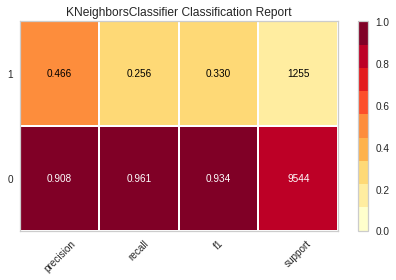

In [32]:
plot_model(modelo, plot="class_report")

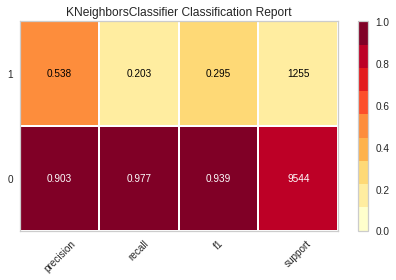

In [33]:
plot_model(modelo_optimo, plot="class_report")

# **Generación del segundo modelo de clasificación**

In [34]:
modelo_2 = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8849,0.8270,0.0345,0.5909,0.0652,0.0530,0.1224
1,0.8855,0.8345,0.0371,0.6364,0.0702,0.0581,0.1341
2,0.8873,0.8145,0.0477,0.7500,0.0898,0.0769,0.1707
3,0.8892,0.8477,0.0690,0.7647,0.1265,0.1094,0.2082
4,0.8864,0.8273,0.0559,0.6176,0.1024,0.0848,0.1613
5,0.8861,0.8487,0.0399,0.6522,0.0752,0.0626,0.1415
6,0.8842,0.8406,0.0532,0.5128,0.0964,0.0762,0.1367
7,0.8867,0.8113,0.0505,0.6552,0.0938,0.0785,0.1600
8,0.8861,0.8247,0.0584,0.6111,0.1065,0.0880,0.1635


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [35]:
print(modelo_2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)


# Optimizacion

In [36]:
modelo_optimo_2 = tune_model(modelo_2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8836,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8836,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8836,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8836,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8839,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8839,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8839,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8839,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8836,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [37]:
print(modelo_optimo_2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)


# Evaluacion del segundo modelo

In [38]:
evaluate_model(modelo_2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [39]:
evaluate_model(modelo_optimo_2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

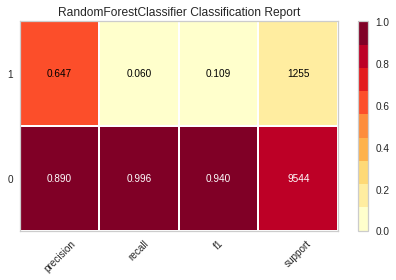

In [40]:
plot_model(modelo_2, plot="class_report")

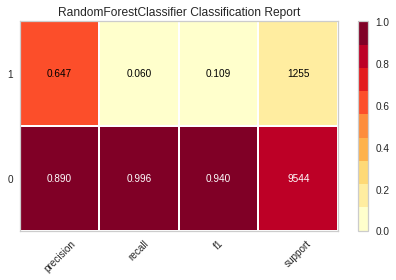

In [41]:
plot_model(modelo_optimo_2, plot="class_report")

# **Conclusiones**

**Primer Modelo**

In [42]:
predict_model(modelo_optimo)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8871,0.8216,0,0,0,0.2470,0.2820


,age,job,marital_married,marital_single,marital_divorced,education_secondary,education_tertiary,education_primary,default,housing,loan,month,duration,campaign,y,prediction_label,prediction_score
32394,22.0,0.119459,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.189687,117.0,1.0,no,no,0.9149
32395,50.0,0.073357,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.104615,155.0,1.0,no,no,0.9362
32396,37.0,0.137842,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.099622,14.0,9.0,no,no,1.0000
32397,52.0,0.108425,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.067633,112.0,1.0,no,no,0.9787
32398,50.0,0.137842,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.099045,103.0,4.0,no,no,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,34.0,0.083883,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.088571,574.0,1.0,no,no,0.6596
43189,34.0,0.108425,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.189687,233.0,3.0,no,no,0.8723
43190,34.0,0.073357,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.067633,102.0,1.0,no,no,1.0000
43191,36.0,0.119459,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.099045,136.0,1.0,no,no,0.9787


**Segundo Modelo**

In [43]:
predict_model(modelo_optimo_2)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8869,0.8299,0,0,0,0.0915,0.1724


,age,job,marital_married,marital_single,marital_divorced,education_secondary,education_tertiary,education_primary,default,housing,loan,month,duration,campaign,y,prediction_label,prediction_score
32394,22.0,0.119459,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.189687,117.0,1.0,no,no,0.81
32395,50.0,0.073357,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.104615,155.0,1.0,no,no,1.00
32396,37.0,0.137842,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.099622,14.0,9.0,no,no,1.00
32397,52.0,0.108425,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.067633,112.0,1.0,no,no,1.00
32398,50.0,0.137842,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.099045,103.0,4.0,no,no,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,34.0,0.083883,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.088571,574.0,1.0,no,no,0.82
43189,34.0,0.108425,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.189687,233.0,3.0,no,no,0.99
43190,34.0,0.073357,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.067633,102.0,1.0,no,no,1.00
43191,36.0,0.119459,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.099045,136.0,1.0,no,no,0.98


**Finalizando y guardando ambos modelos**

In [44]:
finalize_model(modelo_optimo)

Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'duration', 'campaign'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              missing_values=nan,
                                                              strategy='mea...
                                                                   handle_unknown='value',
                                                                   random_state=0,
                                

In [45]:
finalize_model(modelo_optimo_2)


Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'duration', 'campaign'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              missing_values=nan,
                                                              strategy='mea...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, ma

In [46]:
save_model(modelo_optimo, "modelo_optimo")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'duration', 'campaign'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mea...
                                                                    handle_unknown='value',
                                                                    random_state=0,
                  

In [47]:
save_model(modelo_optimo_2, "modelo_optimo_2")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'duration', 'campaign'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mea...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max